# Loading the MNIST datasets in Keras

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

C:\Users\payal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
print(train_images[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

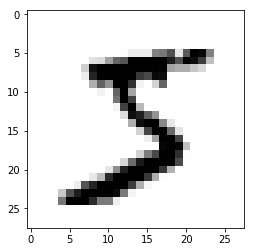

In [13]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()

# The Network Architecture

In [12]:
from keras import models
from keras import layers

network = models.Sequential()
#input layer
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

#output layer
network.add(layers.Dense(10, activation='softmax'))

# The compilation step

In [13]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [14]:
#Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 
#with values in the [0, 255] interval. 
#We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

# Preparing the image data

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/255

# Preparing the labels

In [16]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Train the network

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128 )

Epoch 1/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.2557 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.1033 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.0678 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0505 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0374 - acc: 0.9890


# Evaluate the network

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 1s 74us/step
0.0667492882253835
0.9802


In [19]:
test_labels[0:9]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [20]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)